## Data Prep:

1. Read in the data and apply your data prep function to it.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
income = pd.read_csv("income.csv")

X_train, X_test, y_train, y_test = income_model_prep(income)

In [12]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

## KNN:

### Q1.
1. Scale your feature data frames
2. Fit a KNN model with k = 5, using the features `age` and `hoursperweek`
3. Print the model accuracy score and confusion matrix for both the training and test data
4. Using the test data, create a scatterplot with `age` in the x-axis, `hoursperweek` in the y-axis, and color each point with the predicted class.

In [20]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Accuracy: 0.7584238917989211


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 0.7631332082551595


In [32]:
print(confusion_matrix(y_train, knn.predict(X_train_std)))
print(confusion_matrix(y_test, knn.predict(X_test_std)))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[19402     0]
 [ 6180     0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[4881    0]
 [1515    0]]


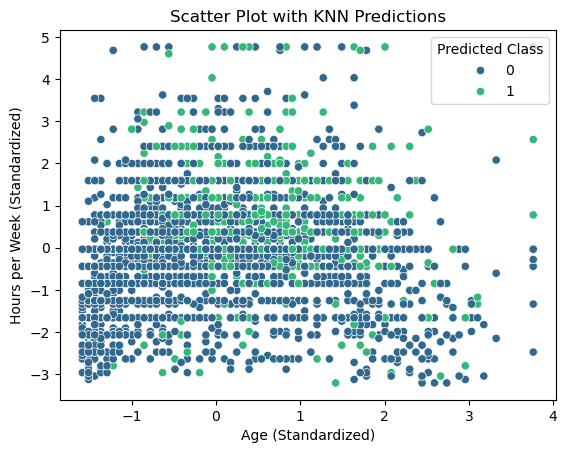

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

age_index = X_train.columns.get_loc("age")
hoursperweek_index = X_train.columns.get_loc("hoursperweek")

# Scatter plot of age vs hoursperweek, colored by predicted class
sns.scatterplot(
    x=X_test_std[:, age_index],  # Standardized 'age' column
    y=X_test_std[:, hoursperweek_index],  # Standardized 'hoursperweek' column
    hue=knn.predict(X_test_std),  # Predictions as the color-coded hue
    palette="viridis"
)

plt.xlabel("Age (Standardized)")
plt.ylabel("Hours per Week (Standardized)")
plt.title("Scatter Plot with KNN Predictions")
plt.legend(title="Predicted Class")
plt.show()

### Q2.

1. Fit a KNN with all features and k=5. Print train and test accuracy.
2. Use GridSearchCV to find the optimal value for k, then print test accuracy and the confusion matrix.

In [40]:
from sklearn.preprocessing import StandardScaler

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [46]:
print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.8745602376671097
Test Accuracy: 0.8245778611632271


In [58]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)

gridsearch.fit(X_train_std, y_train)

best_k = gridsearch.best_params_["n_neighbors"]

In [60]:
k = 5
knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=25)

In [64]:
print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.8412164803377374
Test Accuracy: 0.8281738586616635


In [66]:
print(confusion_matrix(y_test, knn.predict(X_test_std)))

[[4474  407]
 [ 692  823]]


## Logistic Regression

## Q1.

1. Fit a logistic regression to predict income class using just the `age` and `hoursperweek` variables as features.
2. Take some time to interpet the impact of age on the probability someone makes over 50k. What is the impact of a one year increase in age?
3. Plot age vs. predicted probability.

In [73]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Train Accuracy: 0.8442654991791103
Test Accuracy: 0.8497498436522827


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[4551,  330],
       [ 631,  884]])

In [79]:
np.exp(lr.coef_)

array([[0.99542995, 1.0003123 , 1.00067878, 1.01311482, 1.1544006 ,
        0.86359287, 0.82464014, 1.19217322, 0.63554137, 0.8995621 ,
        0.99046611, 0.70932077, 0.9004906 , 0.92646975, 0.85433034,
        0.74299049, 0.82228755, 1.00188926, 0.94478612, 2.02363094,
        1.25694139, 0.38615723, 1.77033477, 0.97444743, 1.264301  ,
        0.71444233, 1.01580325, 3.01593507, 0.92738997, 0.24711384,
        0.84530668, 0.89153324, 0.76865716, 0.72396281, 2.42668967,
        0.7107786 , 0.7153428 , 0.70945904, 0.49683611, 0.96417908,
        2.06757874, 1.01325459, 1.1748614 , 1.15740778, 0.84009194,
        0.64577734, 0.76506641, 0.35754455, 0.56342663, 1.33329288,
        0.85352103, 0.65655794, 0.91487628, 0.70975507, 1.10299234,
        0.99511844, 0.97551013, 0.9784345 , 0.98922789, 0.97347344,
        0.99217376, 0.96476892, 1.00399459, 1.00991916, 1.00529433,
        0.98722221, 0.98107697, 0.98455659, 0.9950472 , 0.99572066,
        0.99884925, 0.9916204 , 0.99584114, 0.99

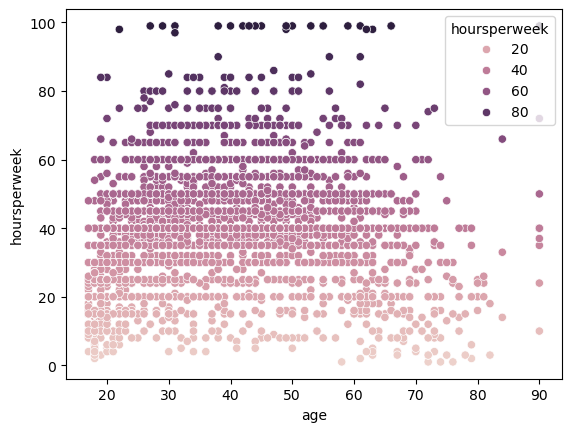

In [81]:
import seaborn as sns

sns.scatterplot(
    x=X_test["age"],  
    y=X_test["hoursperweek"], 
    hue=X_test["hoursperweek"],
);

## Q2.

1. Fit a Regression using all available features - remove features if it appears there is overfitting.

2. Tune the regularization paramters once you've decided on a set of features.

In [ ]:
logreg = LogisticRegression(max_iter=1000)

lr = logreg.fit(, )

print(f"Train Accuracy: {lr.score(, )}")
print(f"Test Accuracy: {lr.score(, )}")

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform()
X_test_std = std.transform()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "C": np.linspace(.05, .15, 10),
    "penalty": ["l1", "l2"]
}

gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000), parameters)

gridsearch.fit(, )

gridsearch.best_params_

In [ ]:
logreg = LogisticRegression(C=, penalty=, solver="saga", max_iter=1000)

lr = logreg.fit(, )

print(f"Train Accuracy: {lr.score(, )}")
print(f"Test Accuracy: {lr.score(, )}")

In [ ]:
confusion_matrix(,lr.predict( ))

## Confusion Matrix Metrics

### Q1.

1. Generate a confusion matrix as well as accuracy, precision, recall and f1 scores for the model below

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

lr = logreg.fit(, )

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(, lr.predict())

In [ ]:
preds = lr.predict()

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

## Q2.

1. Plot the precison and recall curves for your model. Plot F1 vs. the Threshold - where is F1 maximized?
2. Report accuracy, precision, recall, and F1 at the threshold determined above.
3. Plot an ROC curve for your model and calculate the AUC score. 

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(, lr.predict_proba()[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()

In [ ]:
# Alternate View

plt.plot(p_curve[:-1],r_curve[:-1], label='Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr.predict_proba()[:,1]>thresh)
    f1.append(f1_score(, ))
    
sns.lineplot(x=thresholds, y=f1);

In [ ]:
thresh = thresholds[f1.index(max(f1))]

thresh

In [ ]:
preds = lr.predict_proba()[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

In [ ]:
from sklearn.metrics import roc_curve, auc
    
# Predict probabilities for the positive class
y_probs = lr.predict_proba(X_train)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Calculate the AUC (Area Under the Curve)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

## Sampling Methods (solution)

### Q1.

The following steps can be done one by one or in a single cell.

1. Undersample the data to a 2:1 ratio of 0s to 1s and fit a logistic regression - generate a confusion matrix and calculate common evaluation metrics (Accuracy, Precision Recall, F1). 

2. Oversample the data using random oversampling.Create 4x the the current number of 1s. and fit a logistic regression - generate a confusion matrix and calculate common evaluation metrics. 

3. Use SMOTE to oversample the data. Create 4x the the current number of 1s. Fit a logistic regression and generate a confusion matrix, as well as calculate common evaluation metrics. 

4. Which model sampling approach best for this data? Pick the one that gave the best performance at the default threshold, then tune the threshold and report optimized F1 score.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

print(f"Accuracy: {lr.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

In [ ]:
import imblearn.over_sampling as OS
import imblearn.under_sampling as US

logreg = LogisticRegression(max_iter=1000)

lr = logreg.fit(X_train, y_train)

# randomly undersample negative samples: 
RUS = US.RandomUnderSampler(
                   sampling_strategy = 1 / 2,
                   random_state=2023
)

X_train_us, y_train_us = RUS.fit_resample(X_train, y_train)

lr_us = logreg.fit(X_train_us, y_train_us)

# Oversampling
# create 4x as many positive samples

n_pos = y_train.sum()
n_neg = len(y_train) - n_pos
ratio = {1 : n_pos * 4, 0 : n_neg}

# randomly oversample positives
ROS = OS.RandomOverSampler(
    sampling_strategy = ratio,
    random_state=2023
)

X_train_os, y_train_os = ROS.fit_resample(X_train, y_train)

lr_os = logreg.fit(X_train_os, y_train_os)


# SMOTE oversampling for positives
smt = OS.SMOTE(
    sampling_strategy = ratio,
    random_state=2023
)

X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

lr_smt = logreg.fit(X_train_smt, y_train_smt)



# Training Accuracy

print(f"Normal Accuracy: {lr.score(X_train, y_train)}")
print(f"Undersample Accuracy: {lr_us.score(X_train_us, y_train_us)}")
print(f"Oversample Accuracy: {lr_os.score(X_train_os, y_train_os)}")
print(f"SMOTE Accuracy: {lr_smt.score(X_train_smt, y_train_smt)}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Normal Precision: {precision_score(y_train, lr.predict(X_train))}")
print(f"Undersample Precision: {precision_score(y_train_us, lr_us.predict(X_train_us))}")
print(f"Oversample Precision: {precision_score(y_train_os, lr_os.predict(X_train_os))}")
print(f"SMOTE Precision: {precision_score(y_train_smt, lr_smt.predict(X_train_smt))}")

In [ ]:
print(f"Normal Recall: {recall_score(y_train, lr.predict(X_train))}")
print(f"Undersample Recall: {recall_score(y_train_us, lr_us.predict(X_train_us))}")
print(f"Oversample Recall: {recall_score(y_train_os, lr_os.predict(X_train_os))}")
print(f"SMOTE Recall: {recall_score(y_train_smt, lr_smt.predict(X_train_smt))}")

In [ ]:
print(f"Normal F1: {f1_score(y_train, lr.predict(X_train))}")
print(f"Undersample F1: {f1_score(y_train_us, lr_us.predict(X_train_us))}")
print(f"Oversample F1: {f1_score(y_train_os, lr_os.predict(X_train_os))}")
print(f"SMOTE F1: {f1_score(y_train_smt, lr_smt.predict(X_train_smt))}")

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

p_curve, r_curve, t_curve = precision_recall_curve(y_train_smt, lr_smt.predict_proba(X_train_smt)[:,1])

import matplotlib.pyplot as plt

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_smt.predict_proba(X_train_smt)[:,1]>thresh)
    f1.append(f1_score(y_train_smt, y_pred))
    
sns.lineplot(x=thresholds, y=f1);

In [ ]:
thresh = thresholds[f1.index(max(f1))]

thresh

In [ ]:
print(f"SMOTE F1: {f1_score(y_train_smt, lr_smt.predict_proba(X_train_smt)[:, 1] > thresh)}")

### Q2

1. Fit a regression with standard, balanced and 4:1 (minority vs majority) class weights. Calculate the AUC for each.
2. For the weighting that had the best AUC, tune the threshold to maximize F1 score.

In [ ]:
lr = LogisticRegression(max_iter=1000)

lr_balanced = LogisticRegression(class_weight = "balanced", max_iter=1000)

lr_4x = LogisticRegression(class_weight = {1:4, 0:1}, max_iter=1000)

In [ ]:
# equally weighted model (default) 
lr.fit(X_train, y_train)

# multiplies minority by common:rare ratio
lr_balanced.fit(X_train, y_train)

# 4x weight (4x minority)
lr_4x.fit(X_train, y_train)

In [ ]:
lr_score = lr.score(X_test, y_test)
lr_balanced_score = lr_balanced.score(X_test, y_test)
lr_4x_score = lr_4x.score(X_test, y_test)

print(f"Standard Weight score: {lr_score}")
print(f"Balanced Weight score: {lr_balanced_score}")
print(f"4x Weight score: {lr_4x_score}")

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = lr.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
auc_score = auc(fpr, tpr)

print(f"Standard Weight AUC: {auc_score}")

y_probs = lr_balanced.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
auc_score = auc(fpr, tpr)

print(f"Balanced Weight AUC: {auc_score}")

y_probs = lr_4x.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
auc_score = auc(fpr, tpr)

print(f"4x Weight AUC: {auc_score}")

In [ ]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_4x.predict_proba(X_train)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1);

In [ ]:
thresh = thresholds[f1.index(max(f1))]

thresh

In [ ]:
print(f"4x F1: {f1_score(y_train, lr_4x.predict_proba(X_train)[:, 1] > thresh)}")

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score


print(f"F1: {f1_score(y_train, lr.predict(X_train))}")
print(f"F1 Balanced: {f1_score(y_train, lr_balanced.predict(X_train))}")
print(f"F1 4x: {f1_score(y_train, lr_4x.predict(X_train))}")